# K-Means - 유사한 패턴을 발견하여 k개의 클러스터(그룹)로 구분

## 동작 순서

1. k값 설정
2. 지정된 k의 개수 만큼의 랜덤 좌표 설정 - Random Initialization Trap
- 중심점 : 무작위로 선정되는 문제를 해결하기 위해 (K-Means++ 사용)
3. 데이터 중에서 랜덤으로 1개를 중심점으로 선택
4. 나머지 데이터로부터 중심점까지의 거리 계산
5. 중심점과 가장 먼 지점의 데이터를 다음 중심점으로 선택


6. 중심점이 k개가 될 때까지 반복
- 모든 데이터들로부터 가장 가까운 중심점 선택
- 데이터들의 평균 중심으로 중심점 이동
- 중심점이 더 이상 이동되지 않을 때까지 반복(K-Means++)


## 비지도 학습 - Clustering(군집화) - 고객 세분화, 소셜 네트워크 분석 등

In [1]:
import os # 경고 대응
os.environ['OMP_NUM_THREADS'] = '1'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('KMeansData.csv')
dataset.head()

,hour,score
0,7.33,73
1,3.71,55
2,3.43,55
3,3.06,89
4,3.33,79


In [4]:
X = dataset.iloc[:,:].values
X[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

## 데이터 시각화 - 전체 데이터 분포 확인

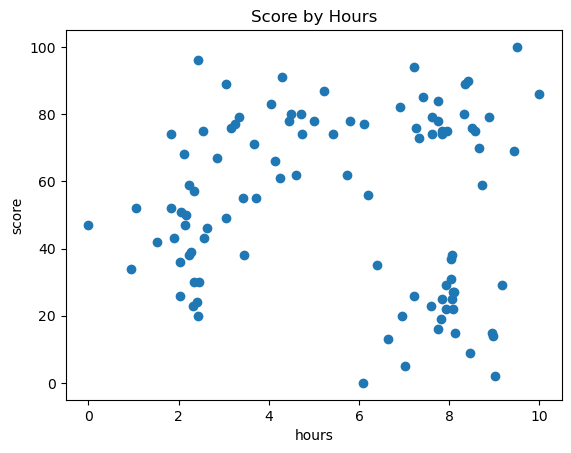

In [5]:
plt.scatter(X[:,0], X[:, 1]) # X 축 : hour, y 축 : score
plt.title('Score by Hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

## 데이터 시각화(축 범위 동일)

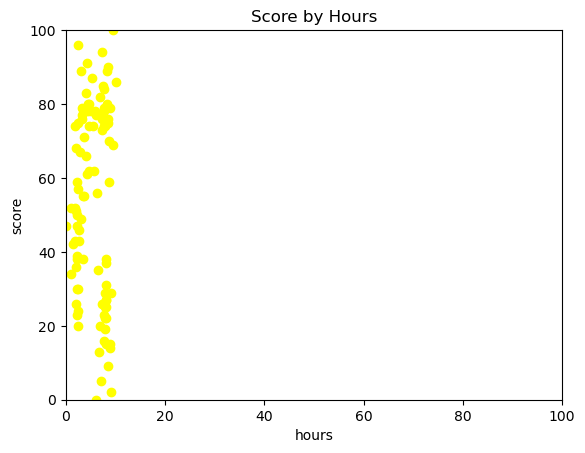

In [6]:
plt.scatter(X[:,0], X[:, 1], alpha=1, color='yellow') # X 축 : hour, y 축 : score
plt.title('Score by Hours')
plt.xlabel('hours')
plt.xlim(0, 100)
plt.ylabel('score')
plt.ylim(0, 100)
plt.show()

# 피처 스케일링(Feature Scaling)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X[:5]

array([[ 0.68729921,  0.73538376],
       [-0.66687438,  0.04198891],
       [-0.77161709,  0.04198891],
       [-0.9100271 ,  1.35173473],
       [-0.8090252 ,  0.96651537]])

# 데이터 시각화(스케일링된 데이터)

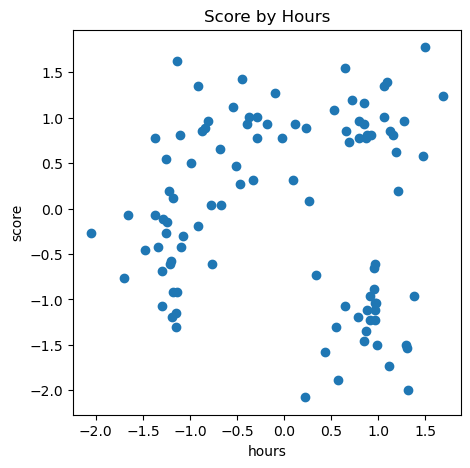

In [10]:
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:, 1]) # X 축 : hour, y 축 : score
plt.title('Score by Hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

## 최적의 K값 찾기 (엘보우 방식 Elbow Method)

In [12]:
from sklearn.cluster import KMeans

C:\Users\Administrator\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Administrator\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Administrator\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Administrator\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

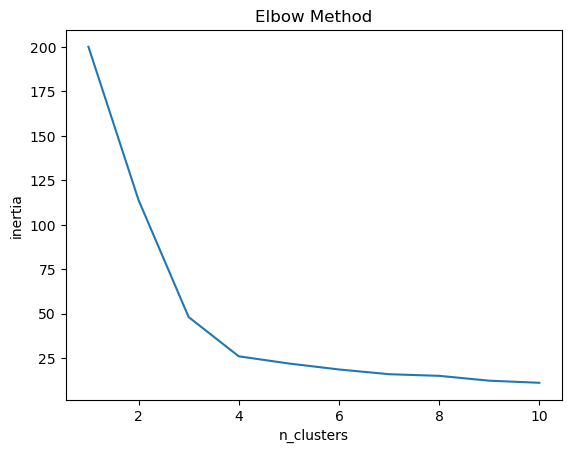

In [15]:
inertia_list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_) # 각 지점으로부터 클러스터의 중심까지의 거리의 제곱의 합
    
plt.plot(range(1, 11), inertia_list)
plt.title('Elbow Method')
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.show()

# 최적의 K값(예:4)으로 학습

In [16]:
K = 4

In [19]:
kmeans=KMeans(n_clusters=K, random_state=0)
y_kmeans = kmeans.fit_predict(X)

C:\Users\Administrator\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [20]:
y_kmeans

array([2, 3, 3, 0, 0, 1, 1, 0, 2, 0, 0, 3, 1, 3, 3, 0, 1, 2, 3, 0, 1, 0,
       3, 1, 2, 2, 3, 3, 3, 3, 1, 1, 3, 0, 2, 2, 3, 0, 0, 0, 3, 1, 2, 3,
       3, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 3, 1, 1, 2, 2, 2, 2, 1,
       1, 0, 1, 2, 3, 2, 2, 2, 3, 3, 3, 3, 0, 2, 1, 2, 1, 1, 2, 0, 3, 1,
       2, 3, 0, 1, 0, 2, 3, 2, 2, 0, 1, 3])

# 데이터 시각화 (최적의 k)

In [22]:
centers = kmeans.cluster_centers_ # 클러스터의 중심점(centroid) 좌표
centers

array([[-0.57163957,  0.85415973],
       [ 0.8837666 , -1.26929779],
       [ 0.94107583,  0.93569782],
       [-1.22698889, -0.46768593]])

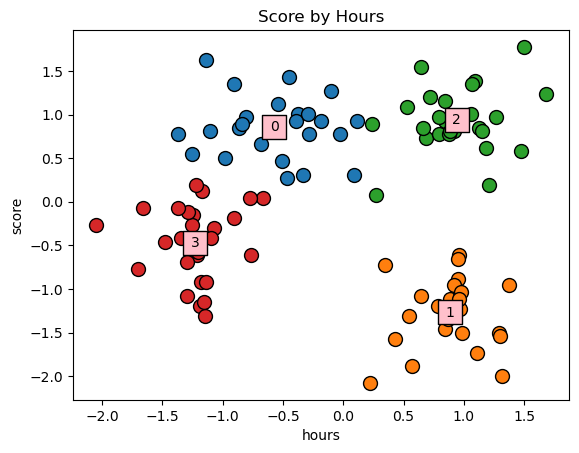

In [27]:
for cluster in range(K):
    plt.scatter(X[y_kmeans == cluster, 0], X[y_kmeans == cluster, 1], s=100, edgecolor='black') # 각 데이터
    plt.scatter(centers[cluster, 0], centers[cluster, 1], s=300, edgecolor='black', color='pink', marker='s') # 중심점 네모
    plt.text(centers[cluster, 0], centers[cluster, 1], cluster, va='center', ha='center') # 클러스터 텍스트 출력
    
plt.title('Score by Hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()